
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0) + 1e-8

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

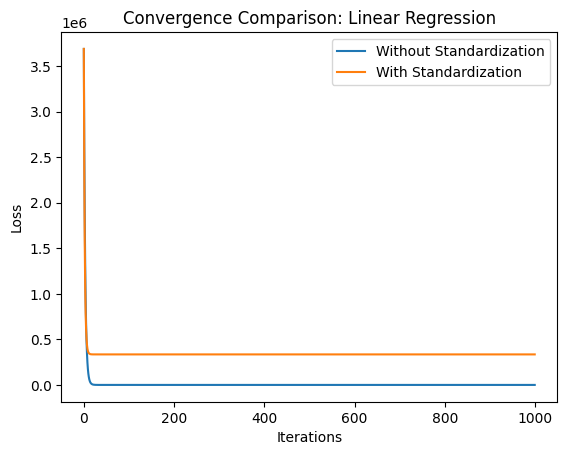

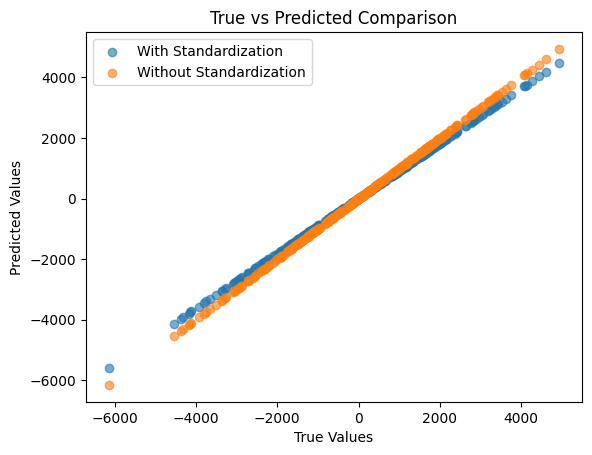

In [34]:
# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used

class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n, d = X.shape
        self.w = np.zeros(d)
        self.b = 0
        self.losses = []

        for _ in range(self.epochs):
            y_hat = X @ self.w + self.b
            error = y_hat - y

            # MSE + L2 regularization
            loss = np.mean(error ** 2) + self.l2_lambda * np.sum(self.w ** 2)
            self.losses.append(loss)

            # Gradients
            dw = (2 / n) * (X.T @ error) + 2 * self.l2_lambda * self.w
            db = (2 / n) * np.sum(error)

            # Update
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X @ self.w + self.b

#generate dataset
np.random.seed(42)

X = np.zeros((300, 2))
X[:, 0] = np.random.randn(300)          # small scale
X[:, 1] = 1000 * np.random.randn(300)   # very large scale

y = 3 * X[:, 0] - 2 * X[:, 1] + 5 + np.random.randn(300)

#standardize
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

#setup linear regression model
model = LinearRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
model_no_scale = LinearRegressionManual(lr=1e-6, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)
#model without standardization.
model_no_scale.fit(X,y)

#run model on scaled dataset
y_pred = model.predict(X_scaled)

#plot results to compare with or without standardization
plt.plot(model_no_scale.losses, label="Without Standardization")
plt.plot(model.losses, label="With Standardization")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Convergence Comparison: Linear Regression")
plt.legend()
plt.show()

y_pred_scaled = model.predict(X_scaled)
y_pred_no_scale = model_no_scale.predict(X)

plt.scatter(y, y_pred_scaled, label="With Standardization", alpha=0.6)
plt.scatter(y, y_pred_no_scale, label="Without Standardization", alpha=0.6)

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Comparison")
plt.legend()
plt.show()

## Effect of Standardization on Convergence

To analyze the effect of standardization, linear regression models were trained with and without feature scaling while keeping all other hyperparameters constant. The dataset was constructed with features having significantly different magnitudes.

Without standardization, the training loss diverged rapidly due to gradient explosion. This occurs because features with large scales dominate the gradient updates, leading to unstable parameter updates during gradient descent. As a result, the optimization fails to converge.

After applying standardization, all features were rescaled to have zero mean and unit variance. This stabilized the gradient updates and enabled smooth and fast convergence of the loss function.

### Conclusion

Standardization improves convergence by preventing large-scale features from dominating gradient updates.


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [35]:
#Implement sigmoid function as told in the lectures
def sigmoid(z):
    z = np.clip(z, -500, 500)  # avoid overflow
    return 1 / (1 + np.exp(-z))

Accuracy without standardization: 0.9533333333333334
Accuracy with standardization: 0.9533333333333334


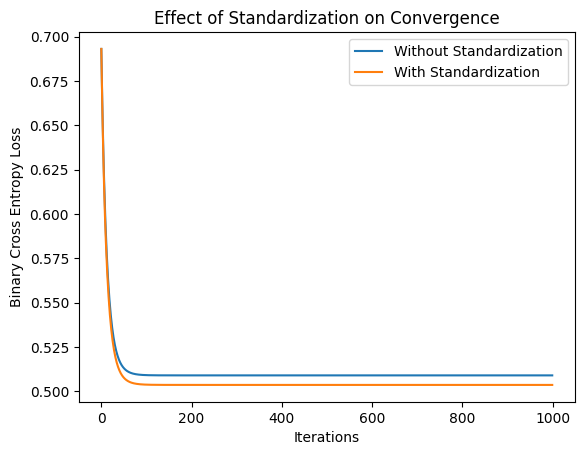

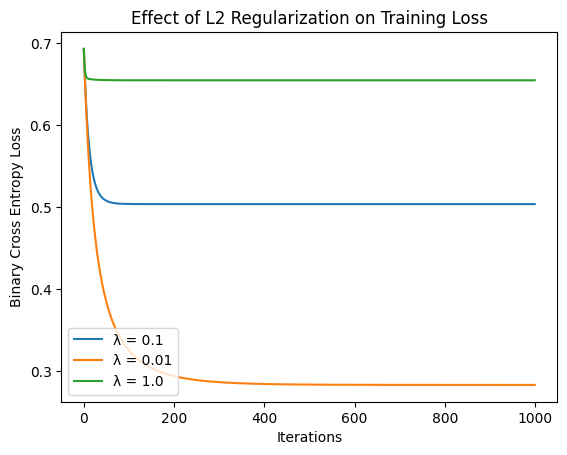

In [40]:
# Logistic Regression implemented from scratch using gradient descent
# Includes L2 regularization (ridge-style)

class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        # learning rate, number of iterations,a regularization strength
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def sigmoid(self, z):
        # clip values to avoid numerical overflow in exp
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # number of samples and features
        n, d = X.shape

        # initialize weights and bias
        self.w = np.zeros(d)
        self.b = 0

        # store loss values for plotting
        self.losses = []

        for _ in range(self.epochs):
            # linear combination
            z = X @ self.w + self.b

            # apply sigmoid to get probabilities
            y_hat = self.sigmoid(z)

            # binary cross entropy loss + L2 regularization
            loss = -np.mean(
                y * np.log(y_hat + 1e-8) +
                (1 - y) * np.log(1 - y_hat + 1e-8)
            ) + self.l2_lambda * np.sum(self.w ** 2)

            self.losses.append(loss)

            # gradients of loss w.r.t weights and bias
            dw = (1 / n) * (X.T @ (y_hat - y)) + 2 * self.l2_lambda * self.w
            db = (1 / n) * np.sum(y_hat - y)

            # parameter update step
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        # convert probabilities to class labels
        probs = self.sigmoid(X @ self.w + self.b)
        return (probs >= 0.5).astype(int)

# set seed for reproducibility
np.random.seed(42)

# create a simple synthetic binary classification dataset
X = np.random.randn(300, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# standardize features for better convergence
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

# train models with different regularization strengths (scaled data)

model = LogisticRegressionManual(
    lr=0.1,
    epochs=1000,
    l2_lambda=0.1
)

model1 = LogisticRegressionManual(
    lr=0.1,
    epochs=1000,
    l2_lambda=0.01
)

model2 = LogisticRegressionManual(
    lr=0.1,
    epochs=1000,
    l2_lambda=1.0
)

# model trained without standardization for comparison
model_no_scale = LogisticRegressionManual(
    lr=0.1,
    epochs=1000,
    l2_lambda=0.1
)

# fit all models
model.fit(X_scaled, y)
model1.fit(X_scaled, y)
model2.fit(X_scaled, y)
model_no_scale.fit(X, y)

# evaluate accuracy with and without standardization
acc_no_scale = np.mean(model_no_scale.predict(X) == y)
acc_scaled = np.mean(model.predict(X_scaled) == y)

print("Accuracy without standardization:", acc_no_scale)
print("Accuracy with standardization:", acc_scaled)

# compare convergence with and without standardization
plt.plot(model_no_scale.losses, label="Without Standardization")
plt.plot(model.losses, label="With Standardization")

plt.xlabel("Iterations")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Effect of Standardization on Convergence")
plt.legend()
plt.show()

# compare effect of different L2 regularization strengths
plt.plot(model.losses, label="λ = 0.1")
plt.plot(model1.losses, label="λ = 0.01")
plt.plot(model2.losses, label="λ = 1.0")

plt.xlabel("Iterations")
plt.ylabel("Binary Cross Entropy Loss")
plt.title("Effect of L2 Regularization on Training Loss")
plt.legend()
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [45]:
from sklearn.cluster import KMeans

def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''

    n, m = M.shape

    # Step 1: Flatten matrix elements into (n*m, 1)
    values = M.reshape(-1, 1)

    # Step 2: Apply K-Means on individual elements
    kmeans = KMeans(
        n_clusters=k,
        max_iter=max_iters,
        n_init=10,
        random_state=42
    )
    labels = kmeans.fit_predict(values)

    # Step 3: Reshape labels back to matrix form
    assignment_table = labels.reshape(n, m)

    # Step 4: Build cookbook
    cookbook = {i: [] for i in range(k)}
    for i in range(n):
        for j in range(m):
            cluster_id = assignment_table[i, j]
            cookbook[cluster_id].append((i, j))

    # Step 5: Extract centroids
    centroids = kmeans.cluster_centers_.flatten()

    return assignment_table, cookbook, centroids

In [46]:
assignment_table, cookbook, centroids = kmeans_matrix(M, k=3)

print("Matrix M:\n", M)
print("\nAssignment Table:\n", assignment_table)
print("\nCentroids:\n", centroids)

print("\nCookbook:")
for cluster, positions in cookbook.items():
    print(f"Cluster {cluster}: {positions}")


Matrix M:
 [[51 92 14 71 60 20 82 86]
 [74 74 87 99 23  2 21 52]
 [ 1 87 29 37  1 63 59 20]
 [32 75 57 21 88 48 90 58]
 [41 91 59 79 14 61 61 46]
 [61 50 54 63  2 50  6 20]]

Assignment Table:
 [[2 0 1 0 2 1 0 0]
 [0 0 0 0 1 1 1 2]
 [1 0 1 2 1 2 2 1]
 [1 0 2 1 0 2 0 2]
 [2 0 2 0 1 2 2 2]
 [2 2 2 2 1 2 1 1]]

Centroids:
 [83.92857143 15.06666667 54.26315789]

Cookbook:
Cluster 0: [(0, 1), (0, 3), (0, 6), (0, 7), (1, 0), (1, 1), (1, 2), (1, 3), (2, 1), (3, 1), (3, 4), (3, 6), (4, 1), (4, 3)]
Cluster 1: [(0, 2), (0, 5), (1, 4), (1, 5), (1, 6), (2, 0), (2, 2), (2, 4), (2, 7), (3, 0), (3, 3), (4, 4), (5, 4), (5, 6), (5, 7)]
Cluster 2: [(0, 0), (0, 4), (1, 7), (2, 3), (2, 5), (2, 6), (3, 2), (3, 5), (3, 7), (4, 0), (4, 2), (4, 5), (4, 6), (4, 7), (5, 0), (5, 1), (5, 2), (5, 3), (5, 5)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
